In [88]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import math

In [89]:
a = 5
sigma2 = 4  # Дисперсия
sigma = math.sqrt(sigma2)  # Среднеквадратичное отклонение
gamma = 0.93
alpha = 1 - gamma
n = 20
M = 1900

1. Смоделировать выборку из 20 независимых наблюдений над случайной величиной X,
имеющей нормальный закон распределения с параметрами (5,4).

In [90]:
norm_r=sts.norm.rvs(loc=a,scale=sigma, size=n)
print(norm_r)

[ 5.83490372  4.35203141  8.62349868  4.27927829  3.48382336  2.86619165
  3.26564142  6.18808679 10.00888566  7.95603331  4.71359363  5.9707657
  4.88756485  8.31481101  4.61536626  5.35421921  3.05255426  6.60390114
  5.76610609  5.08407668]


1.1. С надежностью 0.93 найти интервальную оценку (доверительный интервал) для
математического ожидания случайной величины X, предполагая, что дисперсия
случайной величины X известна.
*интервальные оценки найти двумя способами.
Первый способ заключается в программной реализации формул для вычисления границ
интервальной оценки, а второй — в использовании метода interval из модуля
статистических функций scipy.stats.

$$P=(Xср- \Delta \le a \le Xср-\Delta)=0.93$$
$$
\Delta=\frac{t_\gamma\sigma}{\sqrt{n}}$$
$$
\Phi(t_\gamma)=\frac{\gamma}{2} $$

In [103]:
x_mean=np.mean(norm_r)
t_value = sts.norm.ppf((1+gamma) / 2)
del_=(t_value*sigma)/math.sqrt(n)
low_bound=x_mean-del_
up_bound=x_mean+del_
print(f"Доверительный интервал для a способ 1): [{low_bound};{up_bound}]")

interval = sts.norm.interval(gamma, loc=np.mean(norm_r), scale=sigma / np.sqrt(n))
print(f"Доверительный интервал (способ 2): [{interval[0]:.4f}, {interval[1]:.4f}]")

Доверительный интервал для a способ 1): [4.75075556858856;6.371377742140321]
Доверительный интервал (способ 2): [4.7508, 6.3714]


1.2. С надежностью 0.93 найти интервальную оценку (доверительный интервал) для
математического ожидания случайной величины X, предполагая, что дисперсия
случайной величины X неизвестна
$$P=(Xср- \Delta \le a \le Xср-\Delta)=0.93$$
$$
\Delta=\frac{t_\gamma*S}{\sqrt{n}}$$
$$
\Phi(t_\gamma)=\frac{\gamma}{2} $$

In [92]:
x_mean = np.mean(norm_r)

# 2. Вычисляем выборочную дисперсию S^2
S_2 = np.var(norm_r, ddof=1) 

S = math.sqrt(S_2)

t_value = sts.t.ppf(1 - alpha / 2, df= n-1)  
print(t_value)

delta = t_value * S / np.sqrt(n)
lower_bound = x_mean - delta
upper_bound = x_mean + delta
print(f"Доверительный интервал для a при неизвестной дисперсии: [{lower_bound:.4f}; {upper_bound:.4f}]")

# 6. Способ с использованием scipy.stats.t.interval
interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=S / np.sqrt(n))
print(f"Доверительный интервал (способ 2): [{interval[0]:.4f}, {interval[1]:.4f}]")

1.9199915971807113
Доверительный интервал для a при неизвестной дисперсии: [4.7205; 6.4016]
Доверительный интервал (способ 2): [4.7205, 6.4016]


1.3. С надежностью 0.93 найти интервальную оценку (доверительный интервал) для
дисперсии случайной величины X.
$$
\left( \frac{(n - 1) S^2}{\chi^2_{\frac{\alpha}{2}, n-1}}, \frac{(n - 1) S^2}{\chi^2_{1 - \frac{\alpha}{2}, n-1}} \right)
$$

In [93]:
chi2_lower = sts.chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = sts.chi2.ppf(1 - alpha / 2, df=n - 1)

# 3. Вычисляем границы доверительного интервала для дисперсии
lower_bound = (n-1) * S_2 / chi2_upper
upper_bound = (n-1) * S_2 / chi2_lower

print(f"Доверительный интервал для дисперсии при надежности 0.93: ({lower_bound:.2f}; {upper_bound:.2f})")

Доверительный интервал для дисперсии при надежности 0.93: (2.31; 7.70)


2. Построить график зависимости длины доверительного интервала от надежности при
неизменном объеме выборки для случаев интервального оценивания математического
ожидания и дисперсии.

C:\Users\user\AppData\Local\Temp\ipykernel_9956\3880007624.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  L_sigma2 = (n - 1) * sigma_estimate / chi2_lower - (n - 1) * sigma_estimate / chi2_upper


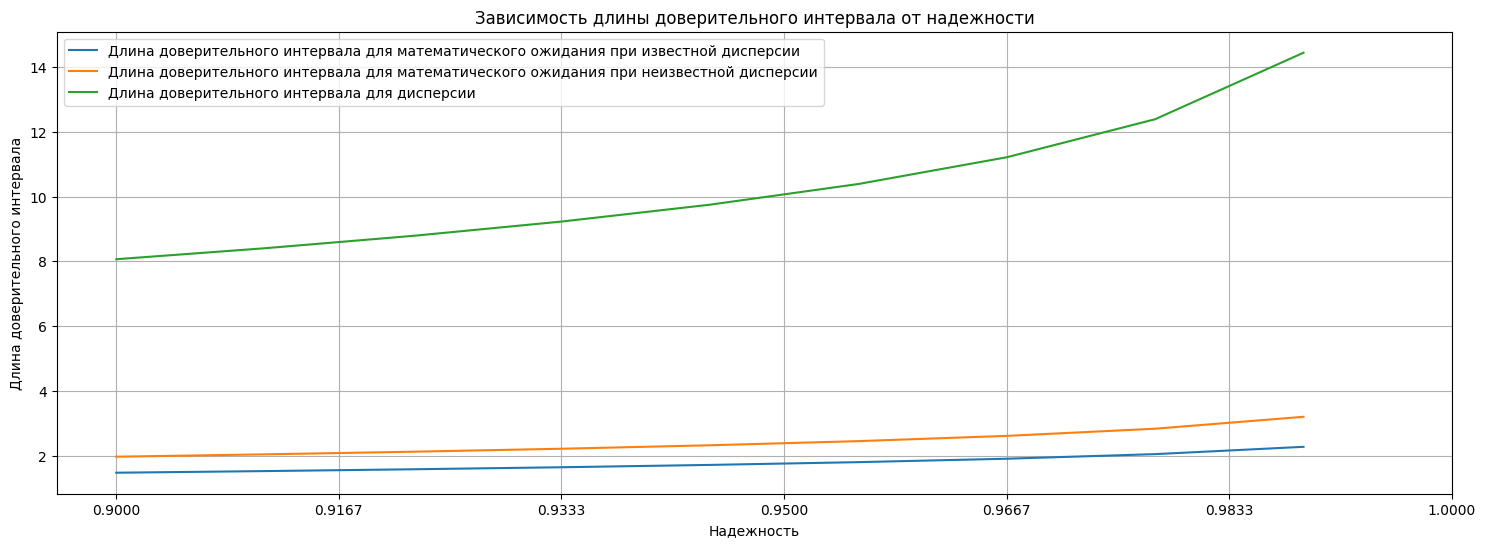

In [94]:
X = np.random.normal(a, sigma, size=n)  # Выборка для оценки дисперсии
GAMMA_values = np.linspace(0.90, 1, 10)  # Разные уровни надежности
# 1. Для оценки математического ожидания (при известной дисперсии)
length_mu = []
for GAMMA in GAMMA_values:
    # Квантиль стандартного нормального распределения
    z_alpha = sts.norm.ppf((1 + GAMMA) / 2)
    # Длина доверительного интервала
    L_mu = 2 * z_alpha * sigma / np.sqrt(n)
    length_mu.append(L_mu)

length_mu_2 = []
for GAMMA in GAMMA_values:
    P = (1+GAMMA) / 2
    t_gamma_0=sts.t.ppf(P, df=len(X)-1)

    sigma_estimate=np.std(X,ddof=1)
    a_left = X.mean() - (sigma_estimate*t_gamma_0/np.sqrt(n))
    a_right = X.mean() + (sigma_estimate*t_gamma_0/np.sqrt(n))
    length_mu_2.append(a_right - a_left)
    

# 2. Для оценки дисперсии
length_sigma2 = []
sigma_estimate = np.var(X, ddof=1)  # Оценка дисперсии
for GAMMA in GAMMA_values:
    # Квантиль распределения хи-квадрат
    chi2_lower = sts.chi2.ppf((1 - GAMMA) / 2, df=n-1)
    chi2_upper = sts.chi2.ppf((1 + GAMMA) / 2, df=n-1)
    # Длина доверительного интервала
    L_sigma2 = (n - 1) * sigma_estimate / chi2_lower - (n - 1) * sigma_estimate / chi2_upper
    length_sigma2.append(L_sigma2)

# Построение графиков
plt.figure(figsize=(18, 6))
plt.plot(GAMMA_values, length_mu, label='Длина доверительного интервала для математического ожидания при известной дисперсии')
plt.plot(GAMMA_values, length_mu_2, label='Длина доверительного интервала для математического ожидания при неизвестной дисперсии')
plt.plot(GAMMA_values, length_sigma2, label='Длина доверительного интервала для дисперсии')

plt.title('Зависимость длины доверительного интервала от надежности')
plt.xlabel('Надежность')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.xticks(np.linspace(0.9, 1, 7))
plt.show()

3. Построить график зависимости длины доверительного интервала от объема выборки при
неизменной надежности для случаев интервального оценивания математического
ожидания и дисперсии.
Пусть объем выборки изменяется от 10 до 50 с шагом 5

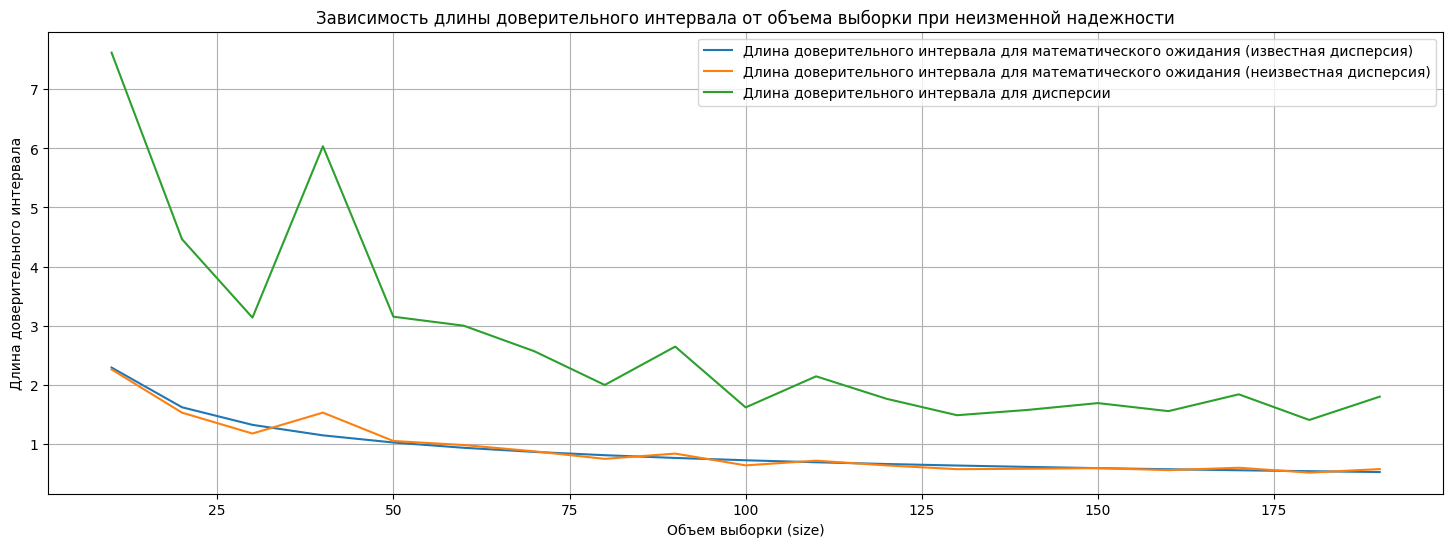

In [95]:
# Массив значений объема выборки
n_values = np.arange(10, 200, 10)

# Длины доверительных интервалов
len_a_sigma_known_ = []  # при известной дисперсии
len_a_sigma_unknown_ = []  # при неизвестной дисперсии
len_sigma_ = []  # для дисперсии

# Генерация выборки и вычисление длин доверительных интервалов для разных n
for size in n_values:
    sample_ = np.random.normal(a, sigma, size)
    sample_mean_ = np.mean(sample_)
    
    # 1. Доверительный интервал для математического ожидания при известной дисперсии
    interval_1_ = sts.norm.interval(confidence = gamma, loc = sample_mean_, scale = sigma / np.sqrt(size))             
    len_a_sigma_known_.append(interval_1_[1] - interval_1_[0])

    # 2. Доверительный интервал для математического ожидания при неизвестной дисперсии
    S___ = np.std(sample_, ddof=1)  # несмещенная оценка стандартного отклонения
    interval_2_ = sts.t.interval(confidence = gamma, df = size-1, loc = sample_mean_, scale = S___ / np.sqrt(size))
    len_a_sigma_unknown_.append(interval_2_[1] - interval_2_[0])

    # 3. Доверительный интервал для дисперсии
    right_ = (1 + gamma) / 2
    left_ = (1 - gamma) / 2
    Y_right_ = sts.chi2.ppf(right_, df=size-1)
    Y_left_ = sts.chi2.ppf(left_, df=size-1)
    S___2 = S___ * S___
    right_bound_ = (size - 1) * S___2 / Y_right_
    left_bound_ = (size - 1) * S___2 / Y_left_
    len_sigma_.append(left_bound_ - right_bound_)

# Построение графиков
plt.figure(figsize=(18, 6))
plt.plot(n_values, len_a_sigma_known_, label='Длина доверительного интервала для математического ожидания (известная дисперсия)')
plt.plot(n_values, len_a_sigma_unknown_, label='Длина доверительного интервала для математического ожидания (неизвестная дисперсия)')
plt.plot(n_values, len_sigma_, label='Длина доверительного интервала для дисперсии')

plt.title('Зависимость длины доверительного интервала от объема выборки при неизменной надежности')
plt.xlabel('Объем выборки (size)')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.show()

4. Смоделировать 1900 выборок из 20 значений нормально распределенной случайной
величины X с параметрами (5,4). По каждой из 1900 выборок с надежностью 0,93 найти
интервальную оценку (доверительный интервал) для математического ожидания случайной
величины X, предполагая, что дисперсия случайной величины X неизвестна.

По результатам моделирования найти точечную оценку $\gamma$* надежности $\gamma$.

In [96]:
# %% 4. Моделирование M выборок и оценка надежности
count_gamma = 0

for _ in range(M):
    sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
    x_mean = np.mean(sample)
    S2 = np.var(sample, ddof=1)
    S = math.sqrt(S2)
    t_value = sts.t.ppf(1 - alpha / 2, df=n - 1)
    delta = t_value * S / math.sqrt(n)
    lower = x_mean - delta
    upper = x_mean + delta
    if lower <= a <= upper:
        count_gamma += 1

gamma_est = count_gamma / M
print(f"Оценка надежности: {gamma_est:.4f}")

Оценка надежности: 0.9200


5. Смоделировать M выборок из n значений нормально распределенной случайной
величины X с параметрами (5,4).

In [97]:
import numpy as np
import scipy.stats as sts
import math
import matplotlib.pyplot as plt

# %% [markdown]
# 5. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a=2, sigma^2=21).

# %%
M = 1900  # Число выборок
n = 20   # Размер выборки
a = 5     # Мат. ожидание
sigma = np.sqrt(4)  # Стандартное отклонение
samples = np.zeros((M, n))

for i in range(M):
    sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
    samples[i] = sample


5.1. По каждой из M выборок найти наблюдаемое значение случайной величины Z
(описание случайной величины Z приведено в Вашем варианте)

$Z = \frac{\bar{X} - a}{S} \cdot \sqrt{n}$

In [98]:
z_arr = []
for sample in samples:
    x_mean = np.mean(sample)
    s_2 = np.var(sample, ddof=1)  # Выборочная дисперсия
    s = np.sqrt(s_2)             # Выборочное стандартное отклонение
    z = np.sqrt(n) * (x_mean - a) / s
    z_arr.append(z)

5.2. По выборке из M значений случайной величины Z найти выборочные числовые
характеристики ее распределения.

In [99]:
z_mean=np.mean(z_arr)
z_var=np.var(z_arr)
z_median = np.median(z_arr)
std= np.std(z_arr) 
skewness = sts.skew(z_arr)        # Коэффициент ассиметрии
kurtosis = sts.kurtosis(z_arr)

# Вывод результатов
print(f'Математическое ожидание: {z_mean:.5f}')
print(f'Медиана: {z_median:.5f}')
print(f'Дисперсия: {z_var:.3f}')
print(f'Стандартное отклонение: {std:.5f}')
print(f'Коэффициент ассиметрии: {skewness:.5f}')
print(f'Эксцесс: {kurtosis:.5f}')

Математическое ожидание: -0.00842
Медиана: -0.00524
Дисперсия: 1.075
Стандартное отклонение: 1.03688
Коэффициент ассиметрии: 0.00871
Эксцесс: 0.20333


5.3. Построить гистограмму относительных частот и теоретическую кривую распределения
случайной величины Z, а также ящичковую диаграмму.

In [100]:
std_z = np.std(z_arr)

# Формула Скотта: ширина бина
h_z = 3.5 * std_z / (M ** (1/3))

#полученные интервалы
bins = (np.arange(min(z_arr), max(z_arr) + h_z, h_z))
print(bins)

[-3.8135874  -3.52057857 -3.22756973 -2.9345609  -2.64155207 -2.34854323
 -2.0555344  -1.76252556 -1.46951673 -1.1765079  -0.88349906 -0.59049023
 -0.29748139 -0.00447256  0.28853627  0.58154511  0.87455394  1.16756277
  1.46057161  1.75358044  2.04658928  2.33959811  2.63260694  2.92561578
  3.21862461  3.51163345  3.80464228]


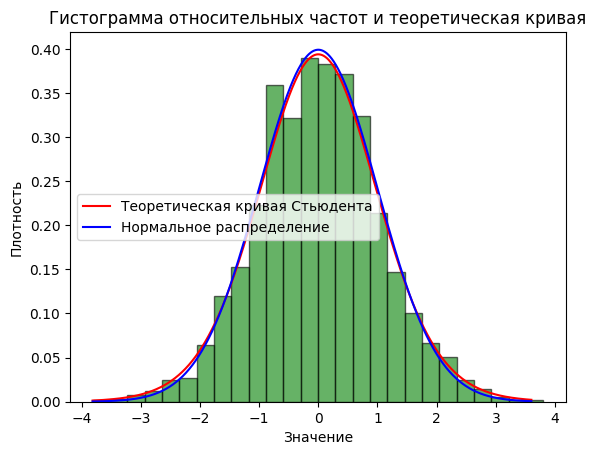

In [106]:
plt.hist(z_arr, bins=bins, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Гистограмма относительных частот')
plt.xlabel('Значение Z')
plt.ylabel('Плотность')

# Теоретическая кривая распределения Стьюдента
x = np.linspace(np.min(z_arr), np.max(z_arr), 1900)
pdf = sts.t.pdf(x, n - 1)
plt.plot(x, pdf, 'r', label="Теоретическая кривая Стьюдента")

y = np.linspace(np.min(z_arr), np.max(z_arr), 1900)
pdf = sts.norm.pdf(y, 0, 1)
plt.plot(y, pdf, 'b', label="Нормальное распределение")

plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Показать график
plt.show()

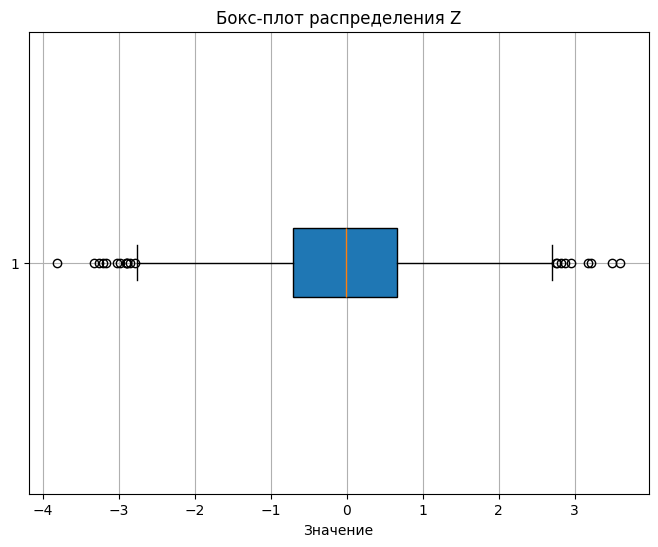

Фактическое количество выбросов: 21


In [102]:
plt.figure(figsize=(8, 6))
plt.boxplot(z_arr, vert=False, patch_artist=True)
plt.title('Бокс-плот распределения Z')
plt.xlabel('Значение')
plt.grid(True)
plt.show()

q1 = np.percentile(z_arr, 25)
q3 = np.percentile(z_arr, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = []
for i in z_arr:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
num_outliers = len(outliers)
print(f"Фактическое количество выбросов: {num_outliers}")